In [6]:
import scipy
import os
import warnings
import numpy as np
from model import DGN
from scipy.io import loadmat
import matplotlib.pyplot as plt
import torch.nn
import contextlib
import sys


plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Arial', 'Liberation Serif']

#### 1. inspect

#### 2. data preprocessing

In [7]:
def normalize_matrix(connectivity_matrix):
    np.fill_diagonal(connectivity_matrix, 0)
    connectivity_matrix[np.logical_or(np.isinf(connectivity_matrix), np.isnan(connectivity_matrix))] = 0
    connectivity_matrix = connectivity_matrix.astype(float)
    
    return connectivity_matrix

In [8]:
connectivity_matrices_ad = []

for i in range(1, 42):
    mat = scipy.io.loadmat(f'data_ad_lmci_R/data_ad_lmci_R/AD_RH/subject{i}.mat')
    connectivity_matrix = mat['A'][:, :, :]
    connectivity_matrix = [normalize_matrix(mat) for mat in connectivity_matrix]
    connectivity_matrices_ad.append(connectivity_matrix)

connectivity_matrices_ad = np.stack(connectivity_matrices_ad)

connectivity_matrices_lmci = []

for i in range(42, 78):
    mat = scipy.io.loadmat(f'data_ad_lmci_R/data_ad_lmci_R/LMCI_RH/subject{i}.mat')
    connectivity_matrix = mat['A'][:, :, :]
    connectivity_matrix = [normalize_matrix(mat) for mat in connectivity_matrix]
    connectivity_matrices_lmci.append(connectivity_matrix)

connectivity_matrices_lmci = np.stack(connectivity_matrices_lmci)


In [9]:
warnings.filterwarnings("ignore", category=UserWarning)

In [12]:
Dataset = "E" 

#Number of simulated subjects (overwriten if Dataset = "E") 
N_Subjects = 41

#Number of nodes for simulated brain networks (overwriten if Dataset = "E") 
N_Nodes = 35

#Number of brain views (overwriten if Dataset = "E")
N_views = 4

#Number of training epochs
N_max_epochs = 500

#Apply early stopping True/False
early_stop =  True

#Random subset size for SNL function  
random_sample_size = 10

#Number of cross validation folds
n_folds = 5

#Learning Rate for Adam optimizer
lr = 0.002

#Name of the model
model_name = "ad_lmci_r_ad_0405"

CONV1 = CONV2 = CONV3 = 8

lambda_r = 200
lambda_b = 5
patience = 6
convergence_threshold = 0.01

#----------------------------------------------------------------------------#
#----------------------------------------------------------------------------#
#                 Below is not to be modified manually                       #
#----------------------------------------------------------------------------#
#----------------------------------------------------------------------------#

import helper

if Dataset.lower() not in ["e", "E", "s", "S"]:
    raise ValueError("Dataset options are E or S.")
    
if (Dataset.lower() == "e"):
    X = connectivity_matrices_ad
    N_Subjects = X.shape[0]
    N_Nodes = X.shape[1]
    N_views = X.shape[3]
else:
    X = helper.create_better_simulated(N_Subjects, N_Nodes) if N_views == 4 else helper.simulate_dataset(N_Subjects, N_Nodes, N_views)


CONFIG = {
        "X": X,
        "N_ROIs":  X.shape[1],
        "N_views":  X.shape[3],
        "N_max_epochs": N_max_epochs,
        "n_folds": n_folds,
        "random_sample_size": random_sample_size,
        "early_stop": early_stop,
        "model_name": model_name
    }

MODEL_PARAMS = {
        "N_ROIs": N_Nodes,
        "learning_rate" : lr,
        "n_attr": X.shape[3],
        "Linear1" : {"in": N_views, "out": CONV1},
        "conv1": {"in" : 1, "out": CONV1},
        
        "Linear2" : {"in": N_views, "out": CONV1*CONV2},
        "conv2": {"in" : CONV1, "out": CONV2},
        
        "Linear3" : {"in": N_views, "out": CONV2*CONV3},
        "conv3": {"in" : CONV2, "out": CONV3},
        "lambda_r" : lambda_r,
        "lambda_b" : lambda_b,
        "patience" : patience,
        "convergence_threshold" : convergence_threshold,
    }

lambda r 200.0 lambda b 5.0
********* FOLD 0 *********
Epoch: 0  |  cbt loss : 54.77 | reservoir loss : 0.0896 | bio loss : 0.90186 | total loss: 62.86 | median cbt mc 9.26 | Time Elapsed: 14.26 | 
Epoch: 10  |  cbt loss : 27.85 | reservoir loss : 0.0885 | bio loss : 0.87187 | total loss: 32.21 | median cbt mc 9.27 | Time Elapsed: 20.45 | 
Epoch: 20  |  cbt loss : 17.93 | reservoir loss : 0.0883 | bio loss : 0.74010 | total loss: 21.63 | median cbt mc 9.28 | Time Elapsed: 20.09 | 
Epoch: 30  |  cbt loss : 14.26 | reservoir loss : 0.0882 | bio loss : 0.41699 | total loss: 16.34 | median cbt mc 10.07 | Time Elapsed: 20.83 | 
Epoch: 40  |  cbt loss : 12.82 | reservoir loss : 0.0881 | bio loss : 0.41257 | total loss: 14.88 | median cbt mc 10.27 | Time Elapsed: 25.23 | 
Epoch: 50  |  cbt loss : 12.77 | reservoir loss : 0.0881 | bio loss : 0.43515 | total loss: 14.94 | median cbt mc 10.27 | Time Elapsed: 42.17 | 
Epoch: 60  |  cbt loss : 12.60 | reservoir loss : 0.0881 | bio loss : 0.39642 |

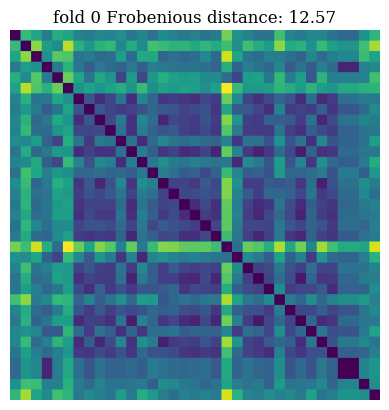

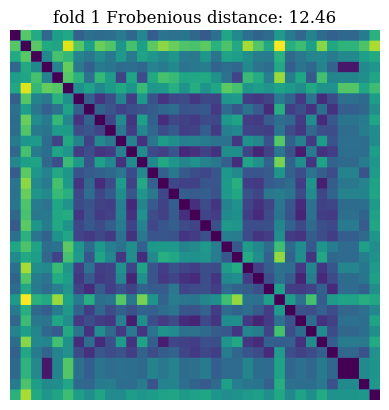

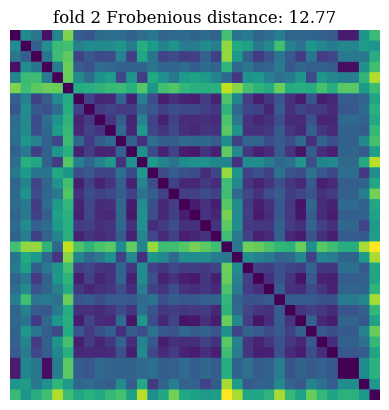

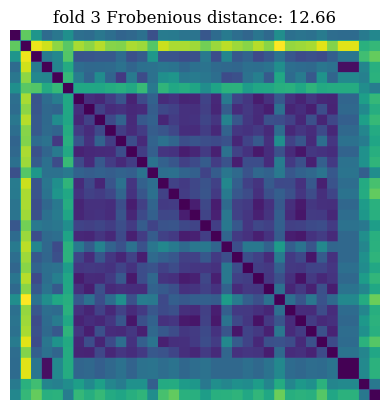

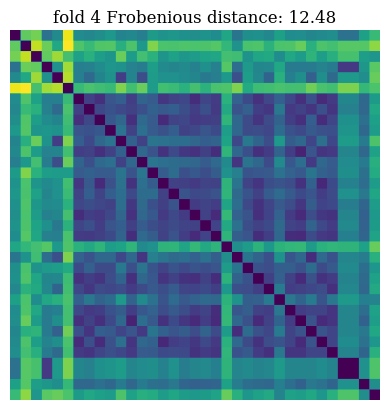

In [13]:
# lambda2 = 50
np.random.seed(35813)
torch.manual_seed(35813)
models = DGN.train_model(
                CONFIG["X"],
                model_params=MODEL_PARAMS,
                n_max_epochs=CONFIG["N_max_epochs"],
                n_folds=CONFIG["n_folds"],
                random_sample_size=CONFIG["random_sample_size"],
                early_stop=CONFIG["early_stop"],
                model_name=CONFIG["model_name"])

In [7]:
Dataset = "E" 

#Number of simulated subjects (overwriten if Dataset = "E") 
N_Subjects = 36

#Number of nodes for simulated brain networks (overwriten if Dataset = "E") 
N_Nodes = 35

#Number of brain views (overwriten if Dataset = "E")
N_views = 4

#Number of training epochs
N_max_epochs = 500

#Apply early stopping True/False
early_stop =  True

#Random subset size for SNL function  
random_sample_size = 10

#Number of cross validation folds
n_folds = 5

#Learning Rate for Adam optimizer
lr = 0.001

#Name of the model
model_name = "ad_lmci_r_lmci"

CONV1 = CONV2 = CONV3 = 8

lambda_r = 200
lambda_b = 50
patience = 3
convergence_threshold = 0.01

#----------------------------------------------------------------------------#
#----------------------------------------------------------------------------#
#                 Below is not to be modified manually                       #
#----------------------------------------------------------------------------#
#----------------------------------------------------------------------------#

import helper

if Dataset.lower() not in ["e", "E", "s", "S"]:
    raise ValueError("Dataset options are E or S.")
    
if (Dataset.lower() == "e"):
    X = connectivity_matrices_lmci
    N_Subjects = X.shape[0]
    N_Nodes = X.shape[1]
    N_views = X.shape[3]
else:
    X = helper.create_better_simulated(N_Subjects, N_Nodes) if N_views == 4 else helper.simulate_dataset(N_Subjects, N_Nodes, N_views)


CONFIG = {
        "X": X,
        "N_ROIs":  X.shape[1],
        "N_views":  X.shape[3],
        "N_max_epochs": N_max_epochs,
        "n_folds": n_folds,
        "random_sample_size": random_sample_size,
        "early_stop": early_stop,
        "model_name": model_name
    }

MODEL_PARAMS = {
        "N_ROIs": N_Nodes,
        "learning_rate" : lr,
        "n_attr": X.shape[3],
        "Linear1" : {"in": N_views, "out": CONV1},
        "conv1": {"in" : 1, "out": CONV1},
        
        "Linear2" : {"in": N_views, "out": CONV1*CONV2},
        "conv2": {"in" : CONV1, "out": CONV2},
        
        "Linear3" : {"in": N_views, "out": CONV2*CONV3},
        "conv3": {"in" : CONV2, "out": CONV3},
        "lambda_r" : lambda_r,
        "lambda_b" : lambda_b,
        "patience" : patience,
        "convergence_threshold" : convergence_threshold,
    }

lambda r 200.0 lambda b 50.0
********* FOLD 0 *********
Epoch: 0  |  cbt loss : 57.24 | reservoir loss : 0.0897 | bio loss : 0.82830 | total loss: 102.24 | median cbt mc 9.26 | Time Elapsed: 4.40 | 
Epoch: 10  |  cbt loss : 38.37 | reservoir loss : 0.0892 | bio loss : 0.76754 | total loss: 76.75 | median cbt mc 9.28 | Time Elapsed: 9.79 | 
Epoch: 20  |  cbt loss : 28.19 | reservoir loss : 0.0890 | bio loss : 0.77045 | total loss: 66.71 | median cbt mc 9.27 | Time Elapsed: 9.07 | 
Epoch: 30  |  cbt loss : 21.30 | reservoir loss : 0.0889 | bio loss : 0.80634 | total loss: 61.62 | median cbt mc 9.29 | Time Elapsed: 9.67 | 
Epoch: 40  |  cbt loss : 17.59 | reservoir loss : 0.0889 | bio loss : 0.78264 | total loss: 56.72 | median cbt mc 9.29 | Time Elapsed: 10.63 | 
Epoch: 50  |  cbt loss : 15.18 | reservoir loss : 0.0889 | bio loss : 0.43573 | total loss: 36.96 | median cbt mc 10.26 | Time Elapsed: 20.07 | 
Epoch: 60  |  cbt loss : 13.91 | reservoir loss : 0.0889 | bio loss : 0.50553 | tot

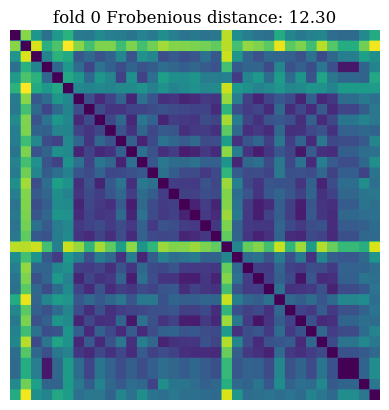

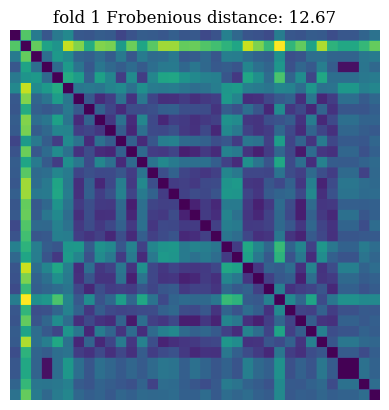

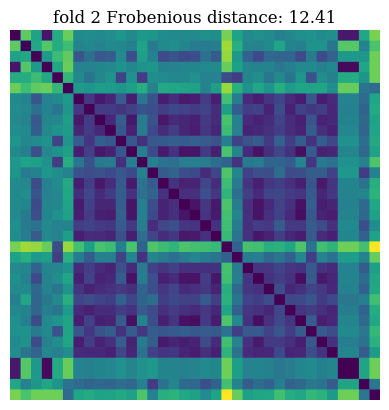

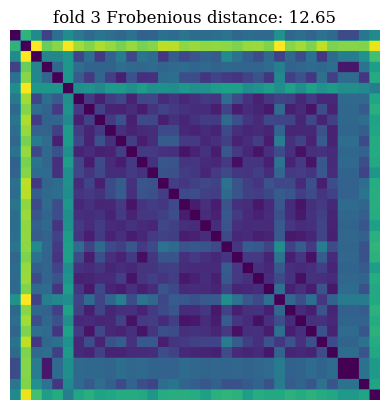

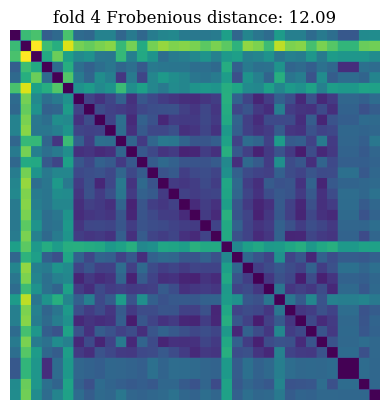

In [8]:
np.random.seed(35813)
torch.manual_seed(35813)
models = DGN.train_model(
                CONFIG["X"],
                model_params=MODEL_PARAMS,
                n_max_epochs=CONFIG["N_max_epochs"],
                n_folds=CONFIG["n_folds"],
                random_sample_size=CONFIG["random_sample_size"],
                early_stop=CONFIG["early_stop"],
                model_name=CONFIG["model_name"])

### data analysis

In [10]:
import numpy as np

memory_capacity_ad = [
# 10.430279970634494,
# 10.412933510792376,
# 10.436739231137008,
# 10.449171027961627,
# 10.424403000515914,
10.458647067023634,
10.422469529540901,
10.437138939517725,
10.450136562350165,
10.42290592683973,
]

bio = [
# 0.43627887311342284,
# 0.4633655582356555,
# 0.35759342073842887,
# 0.37248193636425186,
# 0.40737168952842245,
0.4568668435520132,
0.41074865081751066,
0.44689387381169016,
0.4336424547866378,
0.3918069078949011,
]

fb = [
# 12.605419158935547,
# 12.412900924682617,
# 12.560004234313965,
# 12.417987823486328,
# 12.34809684753418,
12.830342292785645,
12.36379337310791,
12.505098342895508,
12.900346755981445,
12.474309921264648,
]

print("ad",  "memory capacity", np.mean(memory_capacity_ad), np.std(memory_capacity_ad), "bio", np.mean(bio), np.std(bio), "fb", np.mean(fb), np.std(fb))

ad memory capacity 10.438259605054432 0.014443188919619416 bio 0.42799174617255054 0.023789321320305628 fb 12.614778137207031 0.21107897573145112


In [13]:
memory_capacity_lmci = [
10.414734621149663,
10.410148565866786,
10.455798658092977,
10.438268146343495,
10.420385293946882,
]

bio = [
0.4011697877953657,
0.4111952953396613,
0.436361165391869,
0.3891873071170758,
0.3792052678303096,
]

fb = [
12.653182983398438,
12.668946266174316,
12.4050874710083,
12.653182983398438,
12.09333324432373,
]

print("lmci",  "memory capacity", np.mean(memory_capacity_lmci), np.std(memory_capacity_lmci), "bio", np.mean(bio), np.std(bio), "fb", np.mean(fb), np.std(fb))

lmci memory capacity 10.42786705707996 0.01691590717007262 bio 0.40342376469485625 0.019695490752170426 fb 12.494746589660645 0.2234820531455846
